In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [45]:
# Chargement du jeu de données dans un DataFrame:
# Création d'un dictionnaire attibuant un format à chaque variable pour alléger le chargement des données:
types = {"ID" : 'Int64',
         "Country" : object,
         "VFN" : object,
         "Mp" : object, 
         "Mh" : object,
         "Man" : object,
         "MMS" : object, 
         "Tan" : object,
         "T" : object,
         "Va" : object,
         "Ve" : object,
         "Mk" : object,
         "Cn" : object,
         "Ct" : object,
         "Cr" : object,
         "r" : object,
         "m (kg)" : 'Int64',
         "Mt" : 'Int64',
         "Enedc (g/km)" : 'Int64',
         "Ewltp (g/km)" : 'Int64',
         "W (mm)" : 'Int64', 
         "At1 (mm)" : 'Int64', 
         "At2 (mm)" : 'Int64',
         "Ft" : object,
         "Fm" : object,
         "ec (cm3)" : 'Int64',
         "ep (KW)" : 'Int64',
         "z (Wh/km)" : 'Int64',
         "IT" : object,
         "Ernedc (g/km)" :'Float64',
         "Erwltp (g/km)" : 'Float64',
         "De" : 'Float64',
         "Vf" : 'Int64',
         "Status" : object,
         "year" : 'Int64',
         "Fuel consumption" : 'Float64',
         "Electric range (km)" : object}

# Chargement d'un jeu de données dans un DataFrame nommé df:
df = pd.read_csv('Eu_2022.csv',
                 sep=',',
                 dtype = types)

# Affichage des 5 premières lignes:
display(df.head())

C:\Users\pierr\AppData\Local\Temp\ipykernel_16428\1466616636.py:42: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Eu_2022.csv',


,ID,Country,VFN,Mp,Mh,Man,MMS,Tan,T,Va,...,Erwltp (g/km),De,Vf,Status,year,Date of registration,Fuel consumption,ech,RLFI,Electric range (km)
0,77074136,FR,IP-07A1A1E024A_000-VF1-1,RENAULT-NISSAN-MITSUBISHI,RENAULT,RENAULT SAS,NaN,e2*2007/46*0457*23,AH,2BV2,...,<NA>,<NA>,<NA>,F,2022,2022-05-16,NaN,NaN,NaN,188
1,77074137,FR,IP-07A1A1E024A_000-VF1-1,RENAULT-NISSAN-MITSUBISHI,RENAULT,RENAULT SAS,NaN,e2*2007/46*0457*22,AH,2BV2,...,<NA>,<NA>,<NA>,F,2022,2022-03-24,NaN,NaN,NaN,188
2,77074138,FR,IP-07A1A1E024A_000-VF1-1,RENAULT-NISSAN-MITSUBISHI,RENAULT,RENAULT SAS,NaN,e2*2007/46*0457*22,AH,2BV2,...,<NA>,<NA>,<NA>,F,2022,2022-03-17,NaN,NaN,NaN,188
3,77074139,FR,IP-07A1A1E024A_000-VF1-1,RENAULT-NISSAN-MITSUBISHI,RENAULT,RENAULT SAS,NaN,e2*2007/46*0457*22,AH,2BV2,...,<NA>,<NA>,<NA>,F,2022,2022-03-17,NaN,NaN,NaN,188
4,77074140,FR,IP-07A1A1E024A_000-VF1-1,RENAULT-NISSAN-MITSUBISHI,RENAULT,RENAULT SAS,NaN,e2*2007/46*0457*23,AH,2BV2,...,<NA>,<NA>,<NA>,F,2022,2022-05-18,NaN,NaN,NaN,188


In [47]:
df.shape

(9479544, 40)

In [49]:
# Taux de valeurs manquantes par colonnes:
df.isna().sum()/len(df)*100

ID                        0.000000
Country                   0.000000
VFN                       1.250872
Mp                        6.545768
Mh                        0.000000
Man                       0.000760
MMS                     100.000000
Tan                       0.242913
T                         0.035392
Va                        0.199303
Ve                        0.421244
Mk                        0.005275
Cn                        0.873365
Ct                        0.154480
Cr                        0.000454
r                         0.000000
m (kg)                    0.001340
Mt                        1.780328
Enedc (g/km)             82.864397
Ewltp (g/km)              0.088728
W (mm)                    0.438829
At1 (mm)                  1.597703
At2 (mm)                  1.878202
Ft                        0.000000
Fm                        0.001108
ec (cm3)                 13.480153
ep (KW)                   1.362777
z (Wh/km)                77.431826
IT                  

In [51]:
# On met la variable 'Date of registration' au format DateTime
df = df.rename(columns = {'Date of registration' : 'Registr_date'})
df['Registr_date'] = pd.to_datetime(df['Registr_date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9479544 entries, 0 to 9479543
Data columns (total 40 columns):
 #   Column               Dtype         
---  ------               -----         
 0   ID                   Int64         
 1   Country              object        
 2   VFN                  object        
 3   Mp                   object        
 4   Mh                   object        
 5   Man                  object        
 6   MMS                  object        
 7   Tan                  object        
 8   T                    object        
 9   Va                   object        
 10  Ve                   object        
 11  Mk                   object        
 12  Cn                   object        
 13  Ct                   object        
 14  Cr                   object        
 15  r                    object        
 16  m (kg)               Int64         
 17  Mt                   Int64         
 18  Enedc (g/km)         Int64         
 19  Ewltp (g/km)         

In [53]:
# On se sépare des colonnes contenant plus de 80% de valeurs manquantes:
df.drop(['MMS','Enedc (g/km)', 'Ernedc (g/km)', 'De', 'Vf', 'ech', 'RLFI'], axis = 1, inplace = True)

In [55]:
# Dans le cadre de ce projet, notre variable cible sera les émissions de CO2 selon la norme WLTP, en viguer depuis 2019.
# On trouve ces valeurs dans la variable 'Ewltp (g/km)'
# Il y a environ 0.09% des entrées pour lesquelles cette valeur n'est pas renseignée. 
# Nous allons donc supprimer ces entrées:
df.dropna(axis = 'index', subset = ['Ewltp (g/km)'], inplace = True)
df['Ewltp (g/km)'].isna().sum()

0

In [57]:
# Affichage du nombre de valeurs uniques prises par chaque variables:
for col in df.columns:
    print(col, len(df[col].unique()))

ID 9471133
Country 29
VFN 4717
Mp 11
Mh 96
Man 105
Tan 5691
T 1364
Va 4986
Ve 24404
Mk 322
Cn 6728
Ct 6
Cr 5
r 1
m (kg) 2152
Mt 2155
Ewltp (g/km) 390
W (mm) 558
At1 (mm) 721
At2 (mm) 730
Ft 10
Fm 7
ec (cm3) 267
ep (KW) 398
z (Wh/km) 301
IT 136
Erwltp (g/km) 181
Status 1
year 1
Registr_date 366
Fuel consumption  176
Electric range (km) 661


In [59]:
# On remarque que la variable 'r' ne prend qu'une seule modalité. 
# Selon la documentation, cette varable contenait le nombre de véhicules de ce type immatriculé dans le pays au cours de l'année. 
# Depuis 2019, Chaque entrée correspond à un véhicule unique. Cette colonne est devenue désuette est est remplis par la valeur 1 par défaut. 
# Nous pouvons donc nous en défaire. 
df.drop('r', axis=1, inplace = True)

In [61]:
# La colonne Year correspond à l'année de mise en circulation du wéhicule. Ici, il s'agit des véhicules mis en circulation au cours de l'année 2022. 
# Il n'est pas nécessaire de garder cette variable. 
df.drop('year', axis=1, inplace = True)

In [63]:
print(df.duplicated().sum())
# Il y a énormément de doublons. Effacer les doublons nous prive cependant d'une information cruciale :
# le nombre de véhicules de chaque type immatriculés en Europe et par pays. 
# Je vois deux possibilités :
# Garder le DataFrame tel quel ou ajouter une colonne qui donne le nombre de véhicule de ce type immatriculé par pays.

0


In [65]:
# Etudes des différentes variables:
# Variable Country : Nous avons vu précédemment que la variable ne contenait pas de valeurs manquantes.
# D'après la documentation, cette variable correspond au pays d'immatriculation du véhicule.
print('nombre de modalités prises par la variable Country :' ,len(df ['Country'].unique()))
# La variables 'Country' prend 29 Modalités différentes.
print(df['Country'].value_counts())
# Il ne semble pas y avoir de valeurs non cohérente dans cette variable. A conserver telle quelle. 

nombre de modalités prises par la variable Country : 29
Country
DE    2564766
FR    1638878
IT    1312596
ES     850826
PL     416018
BE     366047
NL     305885
SE     282719
AT     214353
CZ     185836
NO     174104
PT     156051
DK     143747
RO     129070
HU     111026
IE     105499
GR     105231
FI      79440
SK      78385
SI      45411
HR      42860
LU      38485
BG      28243
LT      24933
EE      20261
IS      16527
LV      16335
CY      11440
MT       6161
Name: count, dtype: int64


In [67]:
df['VFN'].value_counts()
# Variable qui représente un code à la signfication assez trouble...
# D'après la documentation, il s'agit d'un code dont le format est différent pour les véhicules certifiés avant et après 2017.
# Ce code figure sur le certificat d'immatriculation.
# non exploitable en l'état. A supprimer du DataFrame.

VFN
IP-03_312_0290-ZFA-1        206187
IP-0110-JT1-1               114025
IP-0153-JT1-1                95304
IP-HMH____MA5_5310-VR3-0     87839
IP-HNE____MB6D542C-VR3-0     81833
                             ...  
ip-20u30p294MAA_01-SAL-1         1
IP-22h30D221MAA_07-SAL-1         1
iP-22h30d258MAA_02-SAL-1         1
ip-21820d120MAA_01-SAL-1         1
IP-050056-KNA-1                  1
Name: count, Length: 4716, dtype: int64

In [69]:
# Suppression de la colonne VFN :
df.drop('VFN', axis = 1, inplace = True)

In [71]:
df["Status"].value_counts()
# Variable qui ne prend qu'une seule valeur ('F' pour version finale des données).
# à supprimer

Status
F    9471133
Name: count, dtype: int64

In [73]:
# Supression de la colonne Status:
df.drop('Status', axis = 1, inplace = True)

In [75]:
# nombre de valeurs uniques pour les variables Tan, Type (T), Variante (Va) et Version (Ve)
# Ces variables, si concaténées, sont équivalente au code TVV, qui permet pour chaque constructeur d'identifier 
# le modèle du véhicule ainsi que la finition de ce dernier.
# Le TVV pourrait servir en tant que clé commune dans le cas où on aurait souhaiter fusionner le DataFrame Européen
# avec le DataFrame pour les véhicules en France. Est-ce utile de conserver ces valeurs?
# Ces 3 variables contiennent beaucoup de valeurs uniques, à garder?
print('Nombre de valeurs uniques du champs Tan :',len(df['Tan'].unique()), '\n')
print('Nombre de valeurs uniques du champs T :',len(df['T'].unique()), '\n')
print('Nombre de valeurs uniques du champs Va :', len(df['Va'].unique()), '\n')
print('Nombre de valeurs uniques du champs Ve :', len(df['Ve'].unique()), '\n')

Nombre de valeurs uniques du champs Tan : 5691 

Nombre de valeurs uniques du champs T : 1364 

Nombre de valeurs uniques du champs Va : 4986 

Nombre de valeurs uniques du champs Ve : 24404 



In [77]:
# Supression des colonnes T, Va, Ve:
df.drop(['Tan', 'T', 'Va', 'Ve'], axis = 1, inplace = True)
df.columns

Index(['ID', 'Country', 'Mp', 'Mh', 'Man', 'Mk', 'Cn', 'Ct', 'Cr', 'm (kg)',
       'Mt', 'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm',
       'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT', 'Erwltp (g/km)',
       'Registr_date', 'Fuel consumption ', 'Electric range (km)'],
      dtype='object')

les informations sur les constructeurs sont contenues dans de multiples colonnes : 
Mp : Manufacturer pooling --> Groupe de constructeurs. 11 vals uniques. recouvre 94.5% de la prod Européenne (voir tableau N.A. plus haut)
Mh : Manufacturer name EU standard denomination --> 97 v.u. et 100% de complétion. Semble contenir quelques valeurs à harmoniser.
Man : Manufacturer name OEM declaration --> 108 v.u. et 99.9% de complétion. Semble moins lisible et évident que les valeurs contenues dans Mh
MMS : Manufacturer name MS registry denomination --> Colonne vide. Déjà retirée du DataFrame
Mk : Make --> contient 377 v.u. Trop de Valeurs uniques à mon gout, peut rendre la variable difficile à manipuler. 

Je pense qu'il est pertinent de garder la variable Mp (Manufacturer pooling) et la variable Mh pour une affichage plus fin au sein de chaque groupe de constructeur.

Il va cependant falloir faire quelques ajustements sur les valeurs contenues dans la variable Mh (valeurs 'UNKNOWN', harmoniser les différentes marques Ford, Hyundai, Toyota, Suzuki etc...)

In [79]:
print('Nombre de valeurs uniques du champs Mp :',len(df['Mp'].unique()), '\n')
print('Nombre de valeurs uniques du champs Mh :', len(df['Mh'].unique()), '\n')
print('Nombre de valeurs uniques du champs Man :', len(df['Man'].unique()), '\n')
print('Nombre de valeurs uniques du champs Mk :', len(df['Mk'].unique()), '\n')

Nombre de valeurs uniques du champs Mp : 11 

Nombre de valeurs uniques du champs Mh : 96 

Nombre de valeurs uniques du champs Man : 105 

Nombre de valeurs uniques du champs Mk : 322 



In [81]:
print(df['Mp'].unique())
# il y a peu de champs différents pour cette variables. Mp regoupe sous une seule dénomination les groupes automobiles possédant plusieurs maques. 
# Variable pratique pour afficher rapidement des informations concernant des groupes qui représentent plus de 95% des véhicules particuliers immatriculés en 2022.
# Il faut cependant préserver une colonne contenant un nombre de marques plus varié. 
# A voir parmis les variables suivantes.
# Remplacement des nas par 'Other'
df['Mp'] = df['Mp'].fillna('OTHER')

['RENAULT-NISSAN-MITSUBISHI' 'STELLANTIS' 'VOLKSWAGEN' 'BMW' 'FORD'
 'MERCEDES-BENZ' nan 'KIA' 'HYUNDAI MOTOR EUROPE' 'TESLA-HONDA-JLR'
 'MAZDA-SUBARU-SUZUKI-TOYOTA']


In [83]:
df['Mh'].unique()

array(['RENAULT', 'ALFA ROMEO', 'SEAT', 'AUDI AG', 'AUDI HUNGARIA',
       'BMW AG', 'DACIA', 'AUDI SPORT', 'BENTLEY', 'STELLANTIS AUTO',
       'STELLANTIS EUROPE', 'FORD WERKE GMBH', 'MERCEDES-BENZ AG',
       'ALPINA', 'DUPLICATE', 'KIA SLOVAKIA', 'OPEL AUTOMOBILE',
       'HYUNDAI CZECH', 'AA-IVA', 'VOLKSWAGEN', 'TESLA', 'SKODA',
       'HYUNDAI ASSAN', 'SUBARU', 'AUTOMOBILES PEUGEOT', 'VOLVO',
       'HYUNDAI', 'TOYOTA', 'TOYOTA MOTOR CORPORATION', 'PORSCHE',
       'SAIC MAXUS', 'JAGUAR LAND ROVER LIMITED', 'HONDA MOTOR CO',
       'GENERAL MOTORS HOLDINGS', 'MITSUBISHI MOTORS THAILAND',
       'AUTOMOBILES CITROEN', 'NISSAN AUTOMOTIVE EUROPE', 'KIA',
       'CHRYSLER', 'FORD MOTOR COMPANY', 'MAZDA', 'MAZDA EUROPE',
       'MITSUBISHI MOTORS CORPORATION', 'SUZUKI MOTOR CORPORATION',
       'LANZHOU', 'OUT OF SCOPE', 'MAGYAR SUZUKI', 'LEEH', 'UNKNOWN',
       'MERCEDES AMG', 'BMW GMBH', 'ALPINE', 'POLESTAR', 'AA-NSS',
       'FERRARI', 'LAMBORGHINI', 'ASTON MARTIN', 'NIO',
       

In [85]:
# Création d'un dictionnaire pour harmoniser les valeurs de la variable Mh:
dict = {"AUDI AG" : "AUDI",
        "AUDI HUNGARIA" : "AUDI",
        "BMW AG" : "BMW",
        "AUDI SPORT" : "AUDI",
        "STELLANTIS AUTO" : "STELLANTIS",
        "STELLANTIS EUROPE" : "STELLANTIS",
        "FORD WERKE GMBH" : "FORD",
        "MERCEDES-BENZ AG" : "MERCEDES-BENZ",
        "KIA SLOVAKIA" : "KIA",
        "OPEL AUTOMOBILE" : "OPEL",
        "HYUNDAI CZECH" : "HYUNDAI", 
        "HYUNDAI ASSAN" : "HYUNDAI",
        "AUTOMOBILES PEUGEOT" : "PEUGEOT", 
        "TOYOTA MOTOR CORPORATION" : "TOYOTA",
        "JAGUAR LAND ROVER LIMITED" : "JAGUAR / LAND-ROVER", 
        "HONDA MOTOR CO" : "HONDA",
        "GENERAL MOTORS HOLDINGS" : "GENERAL MOTORS",
        "MITSUBISHI MOTORS THAILAND" : "MITSUBISHI",
        "AUTOMOBILES CITROEN" : "CITROEN", 
        "NISSAN AUTOMOTIVE EUROPE" : "NISSAN",
        "FORD MOTOR COMPANY" : "FORD",
        "MAZDA EUROPE" : "MAZDA", 
        "MITSUBISHI MOTORS CORPORATION" : "MITSUBISHI",
        "SUZUKI MOTOR CORPORATION" : "SUZUKI", 
        "MERCEDES AMG" : "MERCEDES-BENZ",
        "MAGYAR SUZUKI" : "SUZUKI",
        "BMW GMBH" : "BMW",
        "SAIC MOTOR CORPORATION" : "SAIC",
        "FORD MOTOR AUSTRALIA" : "FORD"}

# On remplace les variables de Mh grace au dictionnaire pour harmoniser le nom des constructeurs:
df['Mh'] = df['Mh'].replace(to_replace = dict)

In [86]:
print('nombres de valeurs uniques dans la variable Mh :', len(df['Mh'].unique()))
df['Mh'].unique()

nombres de valeurs uniques dans la variable Mh : 82


array(['RENAULT', 'ALFA ROMEO', 'SEAT', 'AUDI', 'BMW', 'DACIA', 'BENTLEY',
       'STELLANTIS', 'FORD', 'MERCEDES-BENZ', 'ALPINA', 'DUPLICATE',
       'KIA', 'OPEL', 'HYUNDAI', 'AA-IVA', 'VOLKSWAGEN', 'TESLA', 'SKODA',
       'SUBARU', 'PEUGEOT', 'VOLVO', 'TOYOTA', 'PORSCHE', 'SAIC MAXUS',
       'JAGUAR / LAND-ROVER', 'HONDA', 'GENERAL MOTORS', 'MITSUBISHI',
       'CITROEN', 'NISSAN', 'CHRYSLER', 'MAZDA', 'SUZUKI', 'LANZHOU',
       'OUT OF SCOPE', 'LEEH', 'UNKNOWN', 'ALPINE', 'POLESTAR', 'AA-NSS',
       'FERRARI', 'LAMBORGHINI', 'ASTON MARTIN', 'NIO', 'SAIC', 'MORGAN',
       'GEELY', 'BYD', 'GREAT WALL MOTOR', 'DFSK', 'JIANGLING MOTOR',
       'MCLAREN', 'CATERHAM', 'LUCID USA', 'MASERATI', 'KG MOBILITY',
       'DR AUTOMOBILES', 'LOTUS', 'MAHINDRA', 'PAGANI', 'RENAULT TRUCKS',
       'ROLLS-ROYCE', 'LEVC', 'BUGATTI', 'ZHAOQING', 'CHINA FAW', 'ANHUI',
       'NEXT EGO MOBILE', 'JIANGXI JIANGLING', 'BRILLIANCE SHINERAY',
       'HAIMA', 'NANJING GOLDEN DRAGON', 'DALLARA', 'DONKERVO

In [89]:
# Il reste deux valeurs non cohérentes dans cette variable : 'OUT OF SCOPE' et 'UNKNOWN':
df2 = df.loc[(df['Mh'] == 'OUT OF SCOPE')]
print("nombre d'entrées dans df2 :", len(df2))
# Il semblerait que dans ce cas, la colonne Man contienne des infos sur le constructeur qui puisse nous aider à trouver le constructeur. 
# Tenter de remplacer les valeurs 'OUT OF SCOPE' et 'UNKNOWN' par les valeurs prises dans la colonne Man?
# D'après la documentation, les véhicules indiqués comme 'Out of scope' sont des véhicules modifiés à ne pas prendre en compte dans ce DataFrame. 
# Nous allons supprimer ces entrées
df['Mh'] = df['Mh'].replace('OUT OF SCOPE', np.nan) # remplacement des valeurs 'OUT OF SCOPE' par des nans
df.dropna(axis = 'index', subset = 'Mh', inplace = True) # Supression des nans

nombre d'entrées dans df2 : 7294


In [90]:
df2 = df.loc[(df['Mh'] == 'UNKNOWN')]
df2.Mk.unique()
# remplacement dans df des valeurs 'unknown' par des nans:
df['Mh'] = df['Mh'].replace({'UNKNOWN' : np.nan})
# remplacement des nans par les valeurs contenues dans la variable Mk
df['Mh'] = df.apply(lambda x: x['Mk'] if x['Mh']==np.nan else x['Mh'], axis = 1)
df['Mh'].unique()

array(['RENAULT', 'ALFA ROMEO', 'SEAT', 'AUDI', 'BMW', 'DACIA', 'BENTLEY',
       'STELLANTIS', 'FORD', 'MERCEDES-BENZ', 'ALPINA', 'DUPLICATE',
       'KIA', 'OPEL', 'HYUNDAI', 'AA-IVA', 'VOLKSWAGEN', 'TESLA', 'SKODA',
       'SUBARU', 'PEUGEOT', 'VOLVO', 'TOYOTA', 'PORSCHE', 'SAIC MAXUS',
       'JAGUAR / LAND-ROVER', 'HONDA', 'GENERAL MOTORS', 'MITSUBISHI',
       'CITROEN', 'NISSAN', 'CHRYSLER', 'MAZDA', 'SUZUKI', 'LANZHOU',
       'LEEH', nan, 'ALPINE', 'POLESTAR', 'AA-NSS', 'FERRARI',
       'LAMBORGHINI', 'ASTON MARTIN', 'NIO', 'SAIC', 'MORGAN', 'GEELY',
       'BYD', 'GREAT WALL MOTOR', 'DFSK', 'JIANGLING MOTOR', 'MCLAREN',
       'CATERHAM', 'LUCID USA', 'MASERATI', 'KG MOBILITY',
       'DR AUTOMOBILES', 'LOTUS', 'MAHINDRA', 'PAGANI', 'RENAULT TRUCKS',
       'ROLLS-ROYCE', 'LEVC', 'BUGATTI', 'ZHAOQING', 'CHINA FAW', 'ANHUI',
       'NEXT EGO MOBILE', 'JIANGXI JIANGLING', 'BRILLIANCE SHINERAY',
       'HAIMA', 'NANJING GOLDEN DRAGON', 'DALLARA', 'DONKERVOORT',
       'LEAPMOTO

In [92]:
# On suprimme les dernieres entrées pour lesquelles la valeur de Mh est manquante:
df.dropna(axis = 'index', subset = 'Mh', inplace = True)

In [95]:
df['Man'].unique()

array(['RENAULT SAS', 'ALFA ROMEO SPA', 'SEAT SA', 'AUDI AG',
       'AUDI HUNGARIA ZRT', 'BAYERISCHE MOTOREN WERKE AG',
       'AUTOMOBILE DACIA SA', 'AUDI SPORT GMBH', 'BENTLEY MOTORS LTD',
       'STELLANTIS AUTO SAS', 'STELLANTIS EUROPE SPA', 'FORD WERKE GMBH',
       'MERCEDES-BENZ AG', 'ALPINA BURKARD BOVENSIEPEN GMBH E CO KG',
       'KIA SLOVAKIA SRO', 'OPEL AUTOMOBILE GMBH',
       'HYUNDAI MOTOR MANUFACTURING CZECH SRO', 'AA-IVA', 'VOLKSWAGEN AG',
       'TESLA INC', 'SKODA AUTO AS',
       'HYUNDAI ASSAN OTOMOTIV SANAYI VE TICARET AS',
       'SUBARU CORPORATION', 'AUTOMOBILES PEUGEOT',
       'VOLVO CAR CORPORATION', 'HYUNDAI MOTOR COMPANY',
       'TOYOTA MOTOR EUROPE NV SA', 'TOYOTA MOTOR CORPORATION',
       'DR ING HCF PORSCHE AG', 'SAIC MAXUS AUTOMOTIVE CO LTD',
       'JAGUAR LAND ROVER LIMITED', 'HONDA MOTOR CO LTD',
       'GENERAL MOTORS HOLDINGS LLC', 'MITSUBISHI MOTORS THAILAND CO LTD',
       'AUTOMOBILES CITROEN', 'NISSAN AUTOMOTIVE EUROPE SAS',
       'KIA COR

In [97]:
# Supression des variables Man et Mk
df.drop(['Man', 'Mk'], axis = 1, inplace = True)
df.columns

Index(['ID', 'Country', 'Mp', 'Mh', 'Cn', 'Ct', 'Cr', 'm (kg)', 'Mt',
       'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm',
       'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT', 'Erwltp (g/km)',
       'Registr_date', 'Fuel consumption ', 'Electric range (km)'],
      dtype='object')

In [99]:
# Variable Cn (Commercial name) contient les modèles. Il y a énormément de valeurs uniques.
#Certaines variables contiennent des infos plus détaillés que d'autres...
print(df.Cn.value_counts())


Cn
SANDERO                                               187078
208                                                   184544
T-ROC                                                 155742
TOYOTA YARIS                                          148018
DUSTER                                                139906
                                                       ...  
NEWC3 5P SHI 12EB6S                                        1
INSIGNIA GS BUSINESS ELEGANCE 1.5D DVH AT8 S/S 122         1
DS 4 E-TENSE 225 RIVOLI                                    1
NUEVO C3 PURETECH 110 S&S FEEL PACK (SOLO STOCK)           1
ZAFIRA LIFE M ELEGANCE 2.0 DIESEL 180 CV AT8               1
Name: count, Length: 5492, dtype: int64


In [101]:
# variabe Ct (Category of vehicle type approved)
print('modalités prises la variable Ct :', df['Ct'].unique())
print('valeurs manquantes dans la variable Ct :', df['Ct'].isna().sum())
# Cette variable représente la catégorie de véhicule classé selon différents critères basé sur sa conception. 
# Cette catégorie peut changer au moment de l'immatriculation. 
# En effet, si un véhicule appartenent à une certaine catégorie 'Ct' est modifié pour y ajouter des accessoires,
# il est possible qu'il change de catégorie au moment de l'immatriculation. 
# C'est pourquoi il me semble plus pertinent de se daser sur les valeurs contenues dans la colonne 'Cn' qui,
# en plus d'être plus pertinent sur la catégorie de véhicule mis en circulation, contient moins de valeurs manquantes.

# Supression de la colonne 'Ct':
df.drop(['Ct'], axis = 1, inplace = True)

modalités prises la variable Ct : ['M1' 'M1G' 'N1' nan 'N1G' 'N2']
valeurs manquantes dans la variable Ct : 14477


In [103]:
# variabe Cr (Category of vehicle type registered)
print('modalités prises la variable Cr :', df['Cr'].value_counts())
print('valeurs manquantes dans la variable Cr :', df['Cr'].isna().sum())

# seulement 43 Valeurs manquantes. On remplace par le mode ou on supprimme les entrées comportant des Nans?
# remplacement par le mode:
df['Cr'] = df['Cr'].fillna(df['Cr'].mode()[0])
print('valeurs manquantes dans la variable Cr après traitement:', df['Cr'].isna().sum())

modalités prises la variable Cr : Cr
M1     9102339
M1G     361294
Name: count, dtype: int64
valeurs manquantes dans la variable Cr : 43
valeurs manquantes dans la variable Cr après traitement: 0


In [105]:
# suppression des entrées pour lesquelles la variable 'm (kg)' est manquante
df.dropna(axis = 'index', subset = 'm (kg)', inplace = True)

In [107]:
# Variables masse (m (kg)) et masse test (Mt)

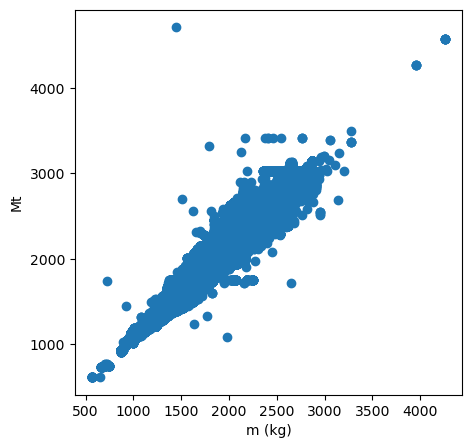

In [109]:
# y'a t'il une relation entre la masse et la masse test?
plt.figure(figsize = (5,5))
plt.scatter(x= 'm (kg)', y = 'Mt', data =df)
plt.xlabel('m (kg)')
plt.ylabel('Mt')
plt.show();

In [111]:
# Il semblerait que les deux variables suivent une corrélation linéaire. 
# A l'aide du module scikitlearn, nous allons déterminer les paramètres de régression linéaire entre les deux variables.
df3 = df.loc[(df['m (kg)'] != np.nan) & (df['Mt'] != np.nan)][['m (kg)', 'Mt']]
print(df3.shape)
model = LinearRegression()
X = df3[['m (kg)']]
y = df3[['Mt']]
print(X.shape)
print(y.shape)
model.fit(X,y)
print('Coefficient R² de la régression :',round(model.score(X,y),2))
# récupération des paramètres de la régression linéaire:
print('equation de la droite de régression :', 'y =',model.coef_, '*X+',model.intercept_)

(9309397, 2)
(9309397, 1)
(9309397, 1)
Coefficient R² de la régression : 0.99
equation de la droite de régression : y = [[1.05555038]] *X+ [38.1953705]


In [113]:
# Variable 'W (mm)' : empatement
print("quantité d'éléments manquants pour la variable Wheelbase :", df['W (mm)'].isna().sum())

# Supression des quelques éléments namquants:
df.dropna(axis = 'index', subset = 'W (mm)', inplace = True)


quantité d'éléments manquants pour la variable Wheelbase : 35194


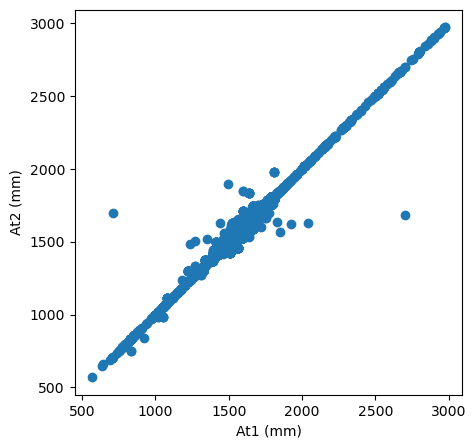

In [115]:
plt.figure(figsize = (5,5))
plt.scatter(x= 'At1 (mm)', y = 'At2 (mm)', data =df)
plt.xlabel('At1 (mm)')
plt.ylabel('At2 (mm)')
plt.show();

In [117]:
# Les deux variables At1 et At2 semblent très fortement corrélées.
# On reproduit le calul de la droite de corrélation comme précédemment:
df4 = df.loc[(df['At1 (mm)'] != np.nan) & (df['At2 (mm)'] != np.nan)][['At1 (mm)', 'At2 (mm)']]
print(df4.shape)
model = LinearRegression()
X = df4[['At1 (mm)']]
y = df4[['At2 (mm)']]
print(X.shape)
print(y.shape)
model.fit(X,y)
print('Coefficient R² de la régression :',round(model.score(X,y),2))
# récupération des paramètres de la régression linéaire:
print('equation de la droite de régression :', 'y =',model.coef_[0], '*X',model.intercept_[0])

(9290011, 2)
(9290011, 1)
(9290011, 1)
Coefficient R² de la régression : 0.94
equation de la droite de régression : y = [1.04204074] *X -63.87433240579094


In [119]:
# On ne récupère dans df que les entrées pour lesquelles les valeurs d'AT1 et AT2 sont non-nulles:
df = df.loc[(df['At1 (mm)'].notna()) & (df['At2 (mm)'].notna())]

In [121]:
# Variable Fuel Type (Ft):
print(df['Ft'].unique())
# Les valeurs prises par cette variable semblent cohérentes et convenablement mises en forme. 
# Il y a cependant quelques entrées pour lesquelles le type de carburant semble inconnu (unknown)
display(df.loc[df['Ft'] == np.nan])
# Il y a 22 entrées pour lesquelles la variable n'est pas convenablement renségnée.
# on supprimme ces 22 lignes.
df['Ft'] = df['Ft'].replace({'unknown' : np.nan})
df.dropna(axis = 'index', subset = ['Ft'], inplace = True)

['electric' 'petrol' 'diesel' 'lpg' 'petrol/electric' 'diesel/electric'
 'ng' 'e85' 'hydrogen' 'unknown']


,ID,Country,Mp,Mh,Cn,Cr,m (kg),Mt,Ewltp (g/km),W (mm),...,Ft,Fm,ec (cm3),ep (KW),z (Wh/km),IT,Erwltp (g/km),Registr_date,Fuel consumption,Electric range (km)


In [123]:
# Variable Fuel Mode (Fm):
print('Valeurs uniques prises par la variable Fuel mode :', df['Fm'].unique())
print("nombre d'entrées pour lesquelles la valeur de Fm est manquante :" , (df['Fm'].isna().sum()))
# L'étape précédente à premis d'enlever les valeurs manquantes pour cette variable.


Valeurs uniques prises par la variable Fuel mode : ['E' 'M' 'B' 'H' 'P' 'F']
nombre d'entrées pour lesquelles la valeur de Fm est manquante : 0


In [125]:
# variable 'ec (cm3)' : Cylindrée du moteur
# vérification en deux étapes : voitures thermiques et hybrides puis voitures électriques:
print('valeurs manquantes pour la variable ec (cm3) pour les voitures possedant un moteur thermique :', df.loc[(df['Ft'] != 'electric'), 'ec (cm3)'].isna().sum())
# supression des entrées du dataframe incluant ces valeurs manquantes:
df_non_electric = df.loc[(df['Ft'] != 'electric') & (df['Ft'] != 'hydrogen')].dropna(axis='index', subset='ec (cm3)')
df = pd.concat([df.loc[(df['Ft'] == 'electric') & (df['Ft'] != 'hydrogen')], df_non_electric])
print('valeurs manquantes pour la variable ec (cm3) après traitement :', df.loc[(df['Ft'] != 'electric'), 'ec (cm3)'].isna().sum())

valeurs manquantes pour la variable ec (cm3) pour les voitures possedant un moteur thermique : 1224
valeurs manquantes pour la variable ec (cm3) après traitement : 0


In [127]:
# Création d'un DataFrame contenant les voitures électriques mises en circulation en 2022: 
df_elec = df.loc[df['Ft'] == 'electric']
# quantité et pourcentage de voitures électriques:
print('quantité de voitures électriques : ', len(df_elec))
print('pourcentage de voitures électriques : ', len(df_elec)/len(df)*100,'%')

# Description du DataFrame pour trouver d'éventuelles erreurs;
display(df_elec.describe())
# Certains véhicules électriques semblent contenir des valeurs de consommation de carburant. 
# Nous allons vérifier si ces véhicules correspondent bien à des véhicules électriques:
display(df_elec.loc[(df_elec['Fuel consumption '] == 6.5) | (df_elec['Fuel consumption '] == 10.1)])
# Il s'agit effectivement de modèles électriques (BMW I3, IX3, Mini Cooper SE et Hyundai GV70 dans sa version électrique). 


quantité de voitures électriques :  1240909
pourcentage de voitures électriques :  13.35921759412022 %


,ID,m (kg),Mt,Ewltp (g/km),W (mm),At1 (mm),At2 (mm),ec (cm3),ep (KW),z (Wh/km),Erwltp (g/km),Registr_date,Fuel consumption
count,1240909.0,1240909.0,1190722.0,1240909.0,1240909.0,1240909.0,1240909.0,0.0,1134857.0,1229404.0,0.0,1210739,24.000000
mean,79223136.201384,1836.852103,1937.562843,0.0,2708.69115,1561.084171,1561.343341,<NA>,145.049829,169.117882,<NA>,2022-08-02 12:07:53.875211520,6.650000
min,236.0,865.0,906.0,0.0,1460.0,710.0,750.0,<NA>,10.0,10.0,<NA>,2022-01-01 00:00:00,6.500000
25%,77064605.0,1577.0,1674.0,0.0,2561.0,1513.0,1513.0,<NA>,87.0,155.0,<NA>,2022-04-29 00:00:00,6.500000
50%,79571826.0,1835.0,1920.0,0.0,2770.0,1571.0,1574.0,<NA>,150.0,165.0,<NA>,2022-08-18 00:00:00,6.500000
75%,81334371.0,2117.0,2234.0,0.0,2875.0,1608.0,1616.0,<NA>,170.0,178.0,<NA>,2022-11-14 00:00:00,6.500000
max,85873927.0,3010.0,3140.0,0.0,3850.0,2972.0,2972.0,<NA>,932.0,526.0,<NA>,2022-12-31 00:00:00,10.100000
std,3191969.126569,380.696549,399.546647,0.0,213.257513,69.597957,74.187347,<NA>,81.053108,25.257577,<NA>,NaN,0.734847


,ID,Country,Mp,Mh,Cn,Cr,m (kg),Mt,Ewltp (g/km),W (mm),...,Ft,Fm,ec (cm3),ep (KW),z (Wh/km),IT,Erwltp (g/km),Registr_date,Fuel consumption,Electric range (km)
1390790,73230455,IE,BMW,BMW,Cooper SE,M1,1440,1501,0,2495,...,electric,E,<NA>,<NA>,152,NaN,<NA>,2022-02-07,6.5,234
1536127,65002265,CZ,BMW,BMW,i3s,M1,1365,1471,0,2570,...,electric,E,<NA>,<NA>,164,NaN,<NA>,2022-01-17,6.5,281
1573283,73302116,FI,BMW,BMW,iX3,M1,2260,2393,0,2864,...,electric,E,<NA>,<NA>,190,NaN,<NA>,2022-03-09,6.5,450
1798609,79306969,NL,BMW,BMW,i3,M1,1345,1465,0,2570,...,electric,E,<NA>,<NA>,162,NaN,<NA>,2022-01-04,6.5,288
1798676,79307036,NL,BMW,BMW,i3,M1,1345,1452,0,2570,...,electric,E,<NA>,<NA>,158,NaN,<NA>,2022-01-03,6.5,296
1798677,79307037,NL,BMW,BMW,i3,M1,1345,1471,0,2570,...,electric,E,<NA>,<NA>,159,NaN,<NA>,2022-01-11,6.5,294
1817543,79325903,NL,BMW,BMW,Cooper SE,M1,1440,1528,0,2495,...,electric,E,<NA>,<NA>,156,NaN,<NA>,2022-01-14,6.5,229
2276440,81350099,DE,BMW,BMW,i3s,M1,1365,1484,0,2570,...,electric,E,<NA>,<NA>,165,NaN,<NA>,2022-01-21,6.5,280
2939705,74746742,RO,BMW,BMW,i3,M1,1345,1472,0,2570,...,electric,E,<NA>,<NA>,157,NaN,<NA>,2022-01-26,6.5,299
3176841,76083933,ES,BMW,BMW,i3,M1,1345,1462,0,2570,...,electric,E,<NA>,<NA>,156,NaN,<NA>,2022-01-21,6.5,300


In [129]:
# On met toutes les valeurs de la variable 'Fuel consumption' à 0 pour les voitures électriques:
df.loc[df['Ft'] == 'electric', 'Fuel consumption '] = 0
df.loc[df['Ft'] == 'electric', 'Fuel consumption '].mean()

0.0

In [131]:
# Taux de valeurs manquantes par colonnes:
df.isna().sum()/len(df)*100

ID                      0.000000
Country                 0.000000
Mp                      0.000000
Mh                      0.000000
Cn                      0.885143
Cr                      0.000000
m (kg)                  0.000000
Mt                      1.337129
Ewltp (g/km)            0.000000
W (mm)                  0.000000
At1 (mm)                0.000000
At2 (mm)                0.000000
Ft                      0.000000
Fm                      0.000000
ec (cm3)               13.359218
ep (KW)                 1.154920
z (Wh/km)              77.267544
IT                     32.439517
Erwltp (g/km)          34.081971
Registr_date            1.717157
Fuel consumption        0.964475
Electric range (km)    79.526375
dtype: float64

In [133]:
# Affichage du nombre de valeurs uniques prises par chaque variables:
for col in df.columns:
    print(col, len(df[col].unique()))

ID 9288785
Country 29
Mp 11
Mh 76
Cn 5004
Cr 2
m (kg) 1823
Mt 2147
Ewltp (g/km) 381
W (mm) 456
At1 (mm) 697
At2 (mm) 689
Ft 8
Fm 6
ec (cm3) 180
ep (KW) 340
z (Wh/km) 296
IT 134
Erwltp (g/km) 181
Registr_date 366
Fuel consumption  176
Electric range (km) 660


In [135]:
print("pourcentage du dataframe original conservé :", len(df)/9479544*100)

pourcentage du dataframe original conservé : 97.98767746634226


In [137]:
#Création d'une nouvelle colonne qui regroupe les pays par aire géographique
Area_dictionary ={
'DE':'EUR_CEN',
'FR':'EUR_W',
'IT':'EUR_SW',
'ES':'EUR_SW',
'BE':'EUR_NW',
'PL':'EUR_CEN',
'NL':'EUR_NW',
'SE':'EUR_NO',
'AT':'EUR_CEN',
'CZ':'EUR_CEN',
'PT':'EUR_SW',
'DK':'EUR_NO',
'RO':'EUR_EST',
'GR':'EUR_SE',
'NO':'EUR_NO',
'IE':'EUR_NW',
'HU':'EUR_CEN',
'SK':'EUR_CEN',
'FI':'EUR_NO',
'HR':'EUR_SE',
'LU':'EUR_W',
'SI':'EUR_CEN',
'BG':'EUR_SE',
'LT':'EUR_EST',
'EE':'EUR_NE',
'LV':'EUR_NE',
'IS':'EUR_NO',
'CY':'EUR_SE',
'MT':'EUR_SO'
}

# Add a new column named 'Area'
df['Area'] = df['Country'].map(Area_dictionary)
# 
print(df['Area'].value_counts())

Area
EUR_CEN    3486750
EUR_SW     2294689
EUR_W      1675848
EUR_NW      766147
EUR_NO      684041
EUR_SE      187377
EUR_EST     151290
EUR_NE       36510
EUR_SO        6133
Name: count, dtype: int64


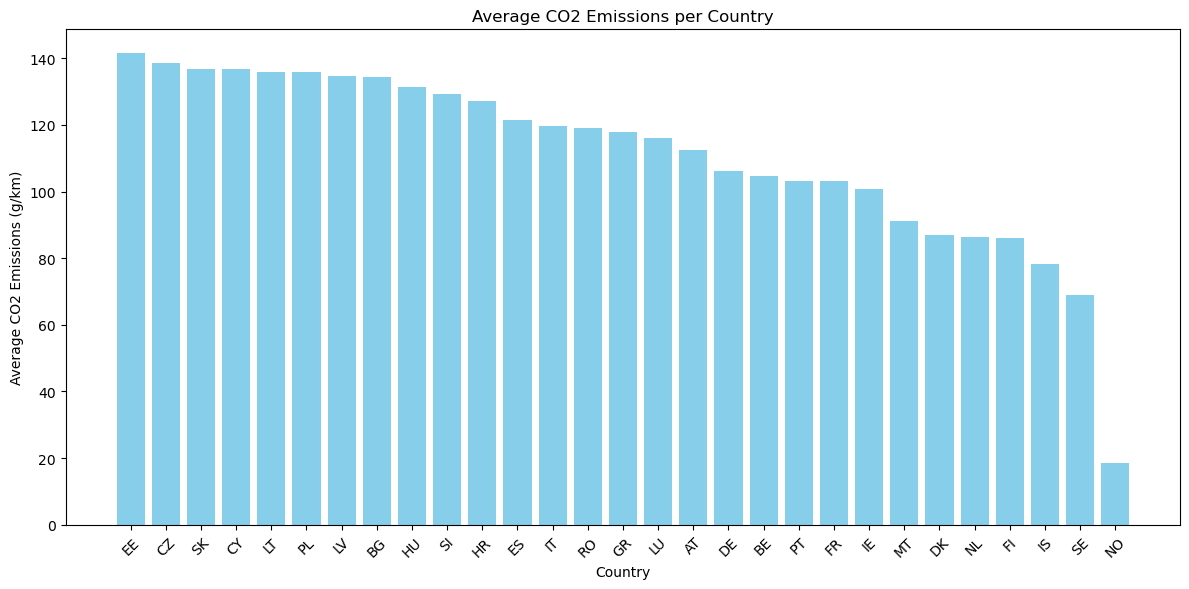

In [139]:
#Groupby par pays et calcul des émissions moyennes :
av_co2 = df.groupby('Country')['Ewltp (g/km)'].mean().reset_index()

# On classe les valeurs par ordre décroissant:
av_co2 = av_co2.sort_values(by='Ewltp (g/km)', ascending=False)

# Construction de la figure
plt.figure(figsize=(12, 6))  
plt.bar(av_co2['Country'], av_co2['Ewltp (g/km)'], color='skyblue')
plt.xlabel('Country')  
plt.ylabel('Average CO2 Emissions (g/km)')  
plt.title('Average CO2 Emissions per Country') 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

C:\Users\pierr\AppData\Local\Temp\ipykernel_16428\1671593109.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Country', y='Ewltp (g/km)', data=df, order = mean_emissions.index, palette = "Paired")


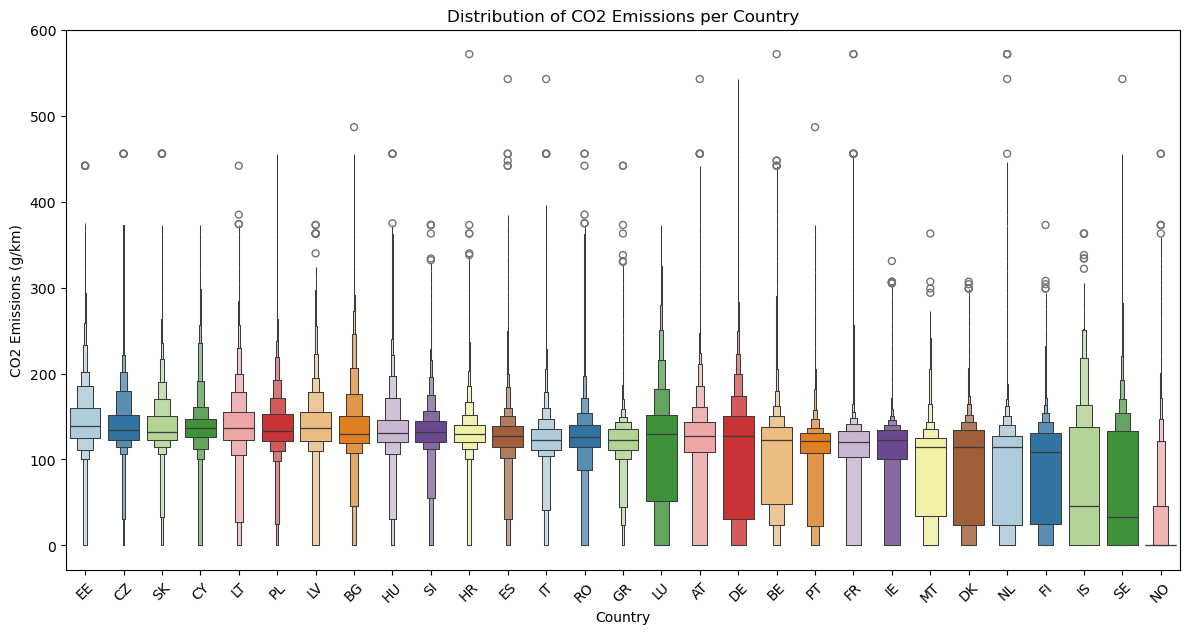

C:\Users\pierr\AppData\Local\Temp\ipykernel_16428\1671593109.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Area', y='Ewltp (g/km)', data=df, order=mean_emissions_area.index, palette = "Paired")


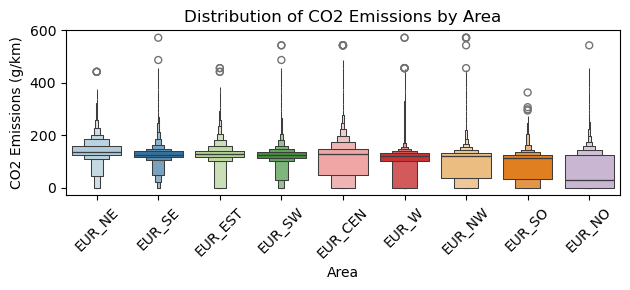

In [141]:
# Construction de la figure
plt.figure(figsize=(12, 12))

# Création du graph par pays:
plt.subplot(2, 1, 1)
mean_emissions = df.groupby('Country')['Ewltp (g/km)'].mean().sort_values(ascending=False)
sns.boxenplot(x='Country', y='Ewltp (g/km)', data=df, order = mean_emissions.index, palette = "Paired")
plt.xlabel('Country')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Distribution of CO2 Emissions per Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# création du graph par aire géographique:
mean_emissions_area = df.groupby('Area')['Ewltp (g/km)'].mean().sort_values(ascending=False)

plt.subplot(2, 1, 2)  # Second subplot
sns.boxenplot(x='Area', y='Ewltp (g/km)', data=df, order=mean_emissions_area.index, palette = "Paired")

plt.xlabel('Area')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Distribution of CO2 Emissions by Area')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

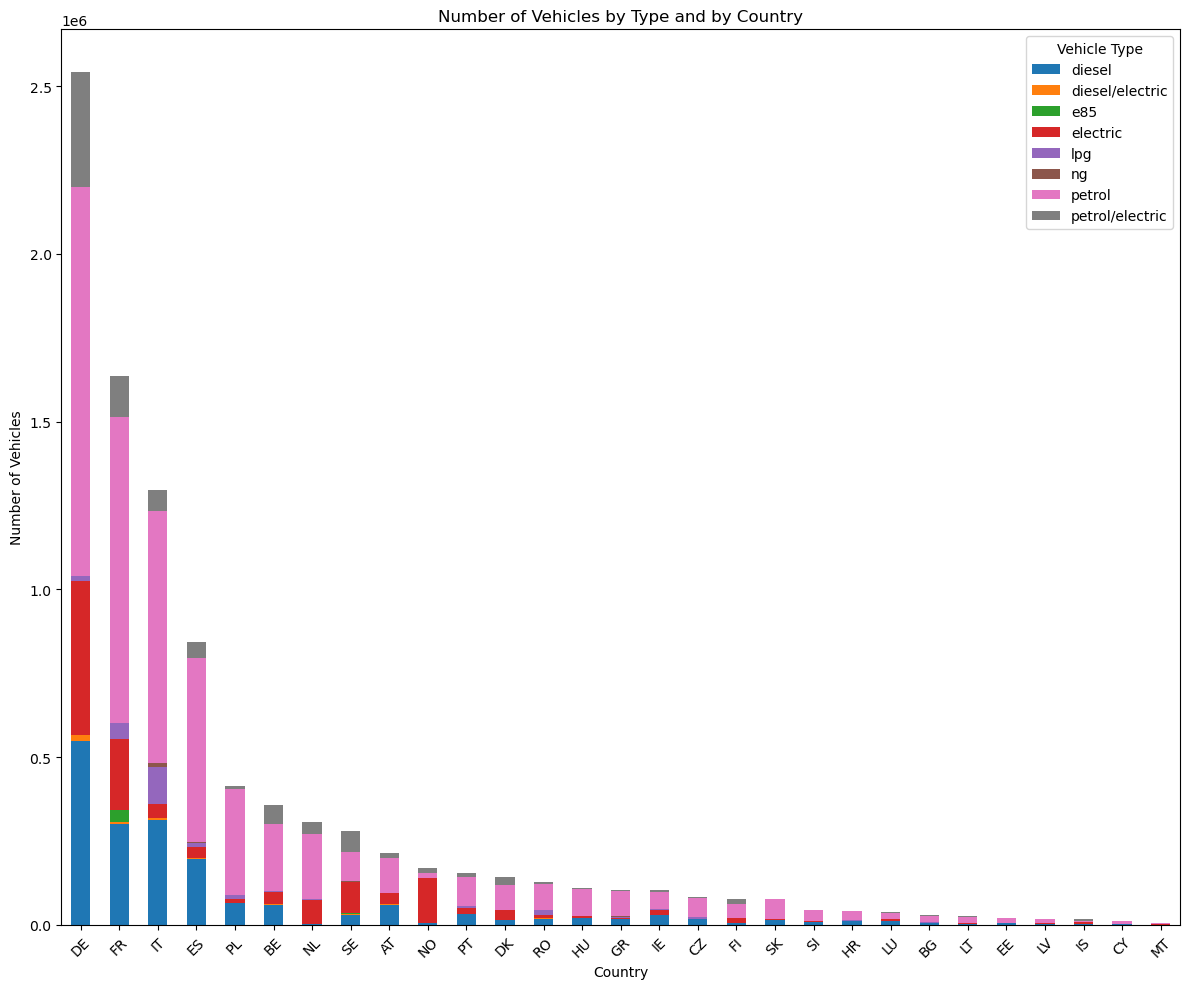

In [142]:
vehicle_counts = df.groupby(['Country', 'Ft']).size().reset_index(name='Count')
pivot_counts = vehicle_counts.pivot(index='Country', columns='Ft', values='Count').fillna(0)

# Calculate the total number of vehicles for each country
pivot_counts['Total'] = pivot_counts.sum(axis=1)

# Sort the DataFrame by the 'Total' column in descending order
sorted_pivot_counts = pivot_counts.sort_values(by='Total', ascending=False)

# Optionally, drop the 'Total' column if you don't need it in the final output
sorted_pivot_counts = sorted_pivot_counts.drop(columns='Total')

# Now you can plot the sorted data if needed
sorted_pivot_counts.plot(kind='bar', stacked=True, figsize=(12, 10))
plt.xlabel('Country')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles by Type and by Country')
plt.xticks(rotation=45)
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.show()

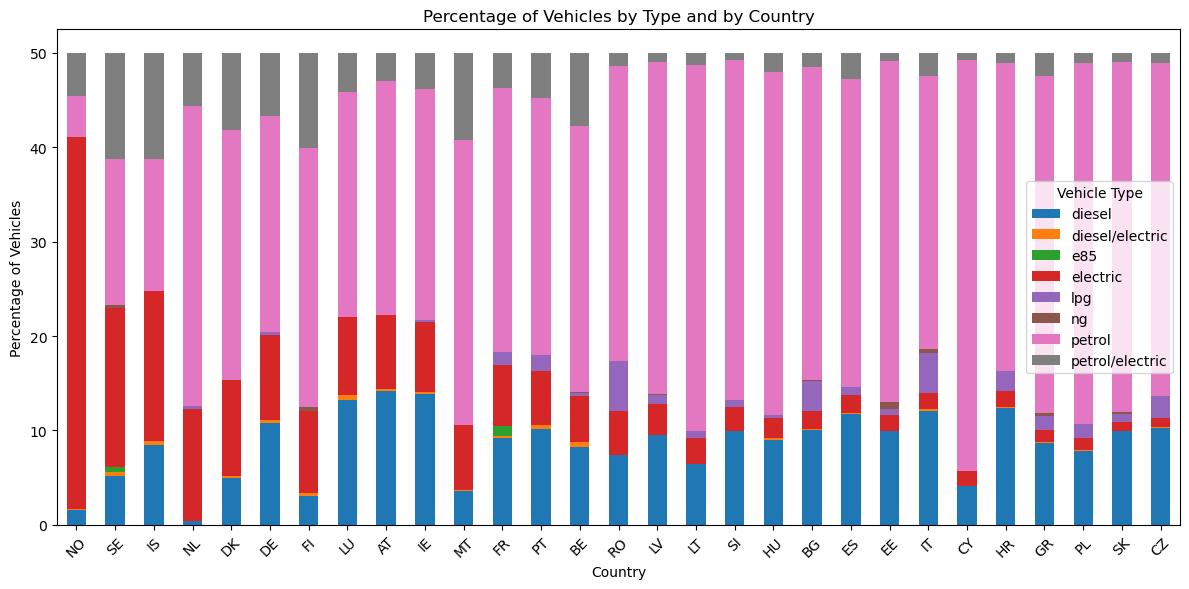

In [145]:
# nombre de véhicule total par pays
pivot_counts['Total'] = pivot_counts.sum(axis=1)

# Calcul du pourcentage de chaque type de véhicule par pays:
percentage_counts = pivot_counts.div(pivot_counts['Total'], axis=0) * 100

# On classe le DataFrame par proportion de véhicules électriques décroissant
sorted_percentage_counts = percentage_counts.sort_values(by='electric', ascending=False)
sorted_percentage_counts = sorted_percentage_counts.drop(columns='Total')

# Construction du graphique:
sorted_percentage_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Country')
plt.ylabel('Percentage of Vehicles')
plt.title('Percentage of Vehicles by Type and by Country')
plt.xticks(rotation=45)
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.show()

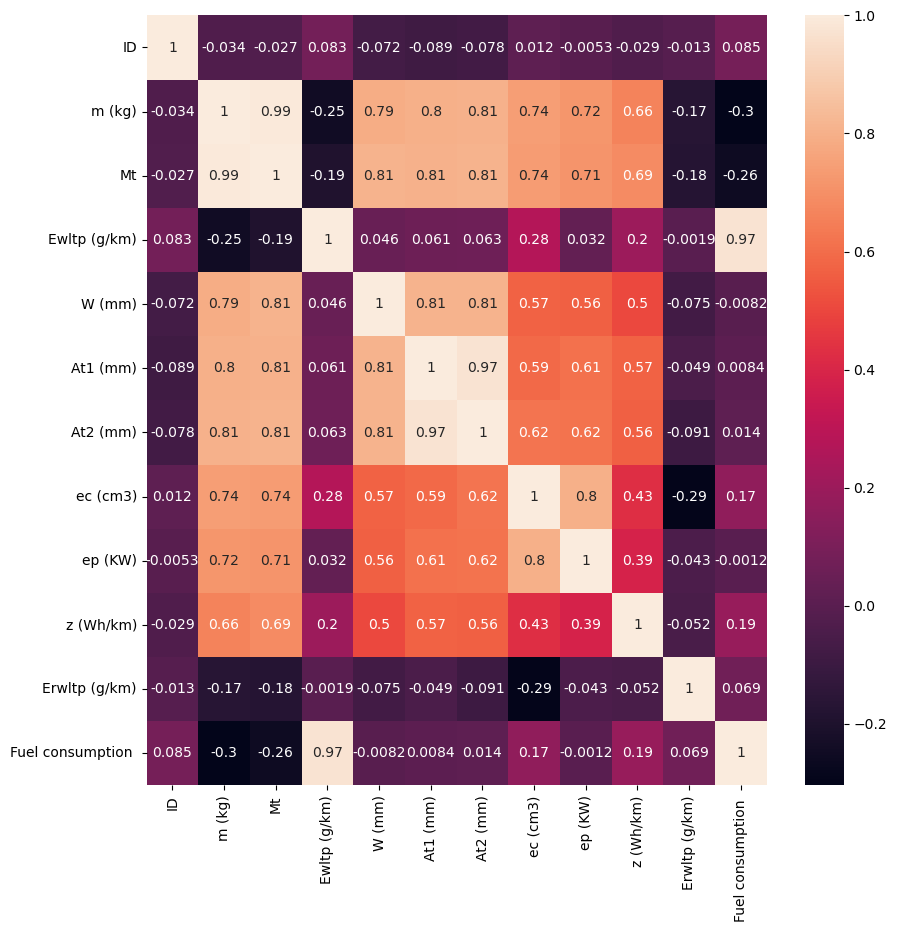

In [147]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True), annot = True)
plt.show()

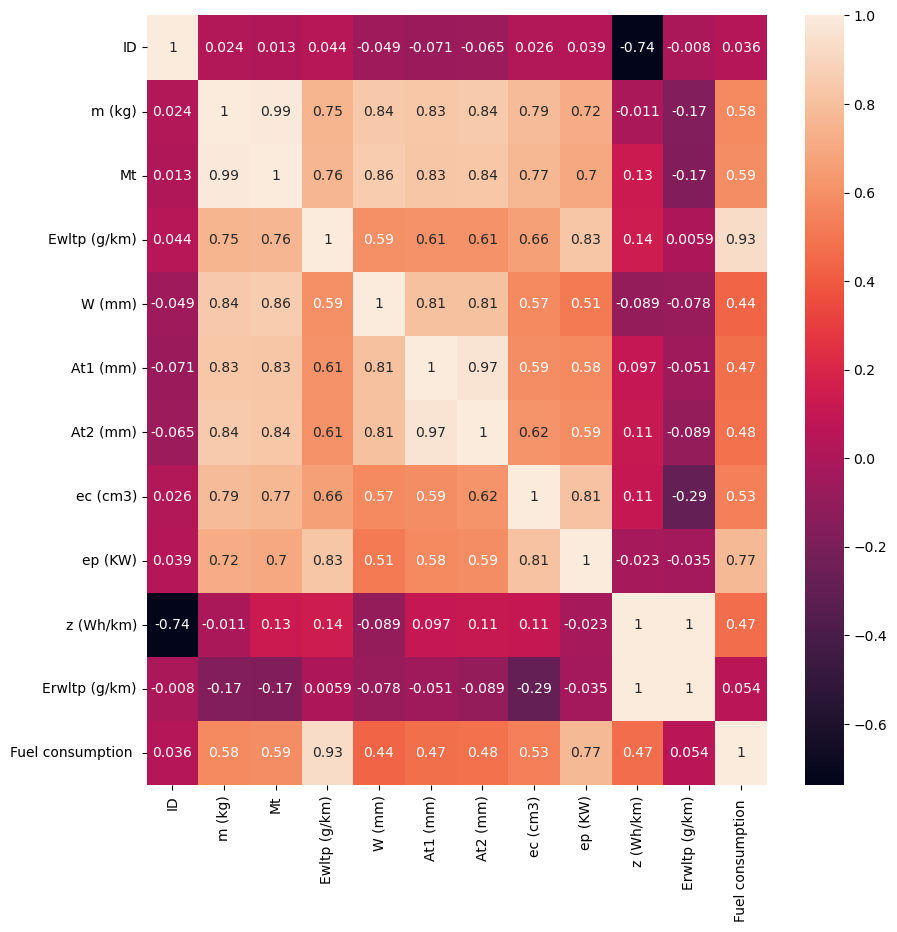

In [149]:
df_ther = df.loc[(df['Ft'] == 'petrol') | (df['Ft'] == 'diesel')]
plt.figure(figsize=(10, 10))
sns.heatmap(df_ther.corr(numeric_only=True), annot = True)
plt.show()

C:\Users\pierr\AppData\Local\Temp\ipykernel_16428\1972344965.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=column, y='Ewltp (g/km)', data=grouped_data_sorted, order=grouped_data_sorted[column],palette='pastel')


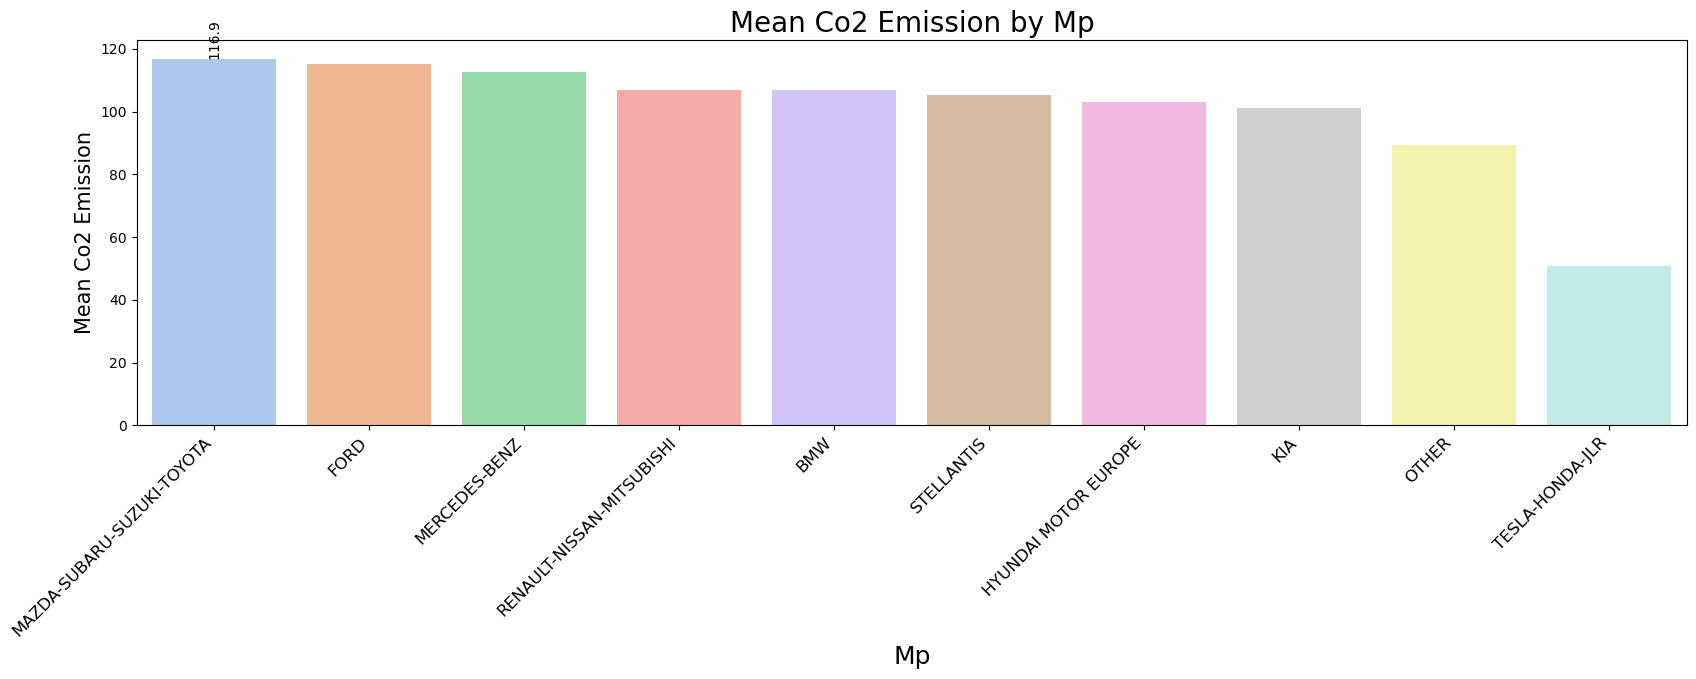

C:\Users\pierr\AppData\Local\Temp\ipykernel_16428\1972344965.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=column, y='Ewltp (g/km)', data=grouped_data_sorted, order=grouped_data_sorted[column],palette='pastel')


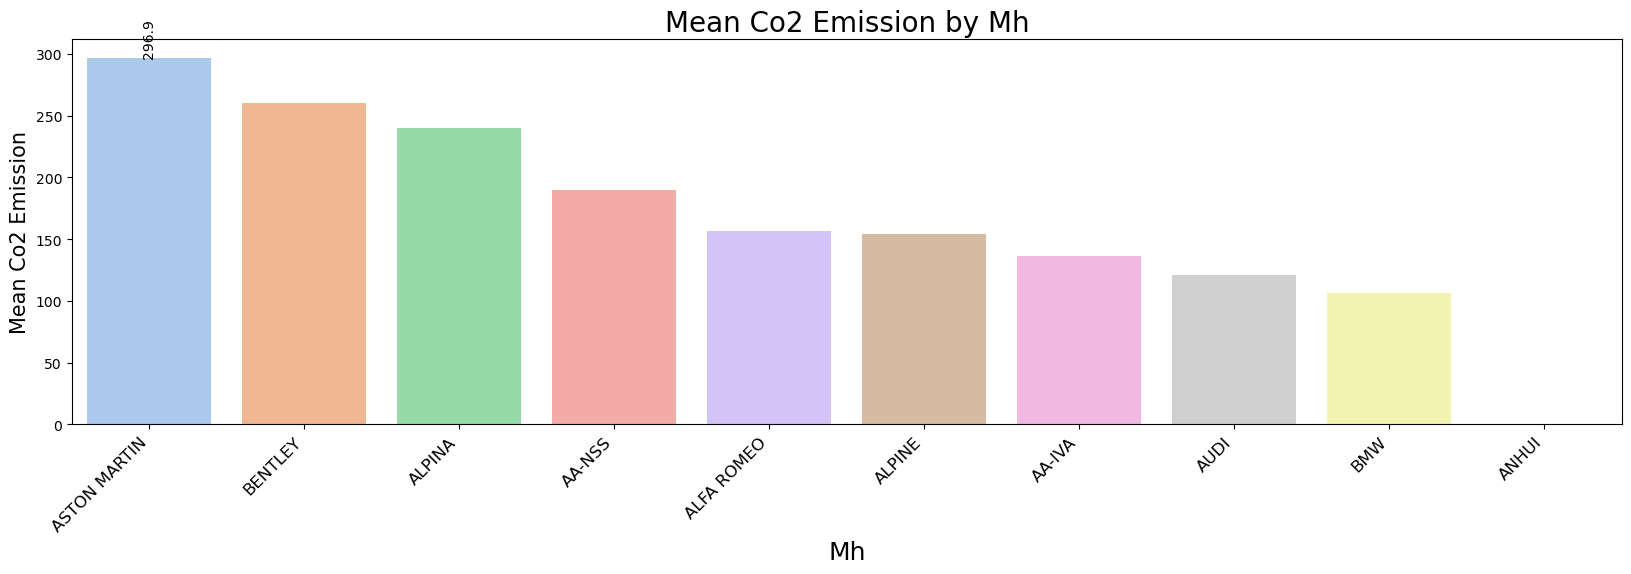

C:\Users\pierr\AppData\Local\Temp\ipykernel_16428\1972344965.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=column, y='Ewltp (g/km)', data=grouped_data_sorted, order=grouped_data_sorted[column],palette='pastel')


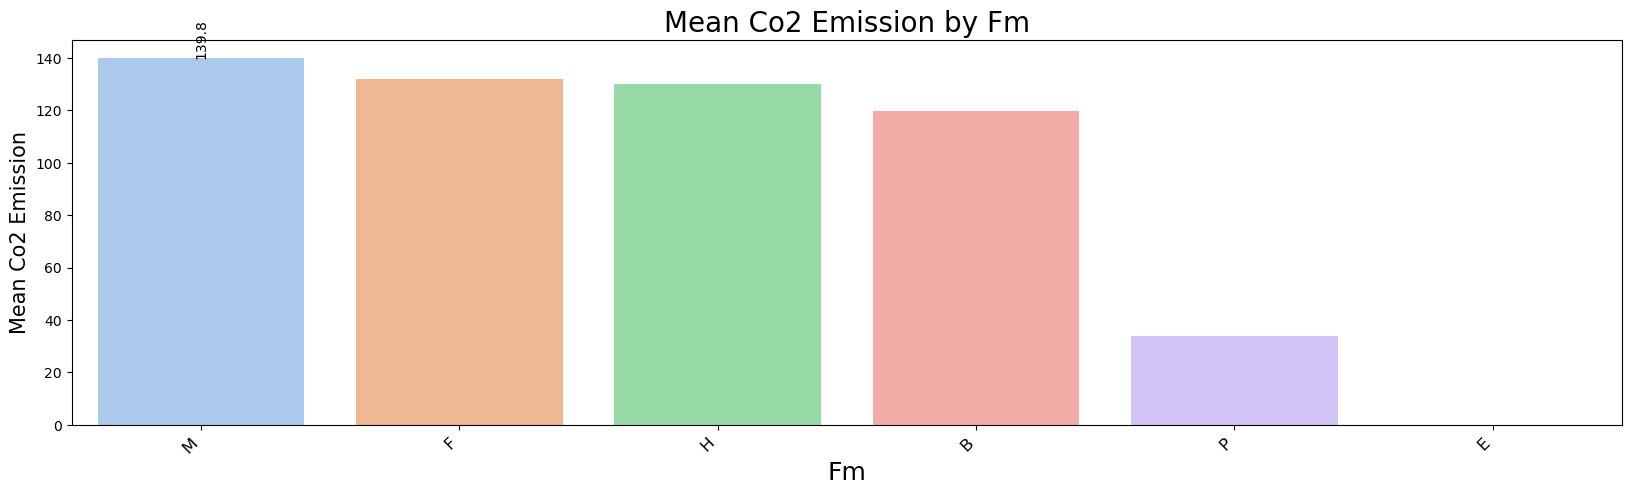

In [151]:
cat_features = ['Mp', 'Mh', 'Fm']

def plot_bar_with_co2(df, columns):
    for column in columns:
        plt.figure(figsize=(20, 5))
        grouped_data = df.groupby(column)['Ewltp (g/km)'].mean().round(1).reset_index().head(10)
        grouped_data_sorted = grouped_data.sort_values(by='Ewltp (g/km)', ascending=False)
        ax = sns.barplot(x=column, y='Ewltp (g/km)', data=grouped_data_sorted, order=grouped_data_sorted[column],palette='pastel')
        ax.bar_label(ax.containers[0],rotation=90)
        plt.xlabel(column, fontsize=18)
        plt.ylabel('Mean Co2 Emission', fontsize=15)
        plt.title(f'Mean Co2 Emission by {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()
      
plot_bar_with_co2(df, cat_features)

In [ ]:
['electric' 'petrol' 'diesel' 'lpg' 'petrol/electric' 'diesel/electric'
 'ng' 'e85' 'hydrogen' 'unknown']

C:\Users\pierr\AppData\Local\Temp\ipykernel_16428\1532897439.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, order=df[column].value_counts().head(15).index,palette='pastel')


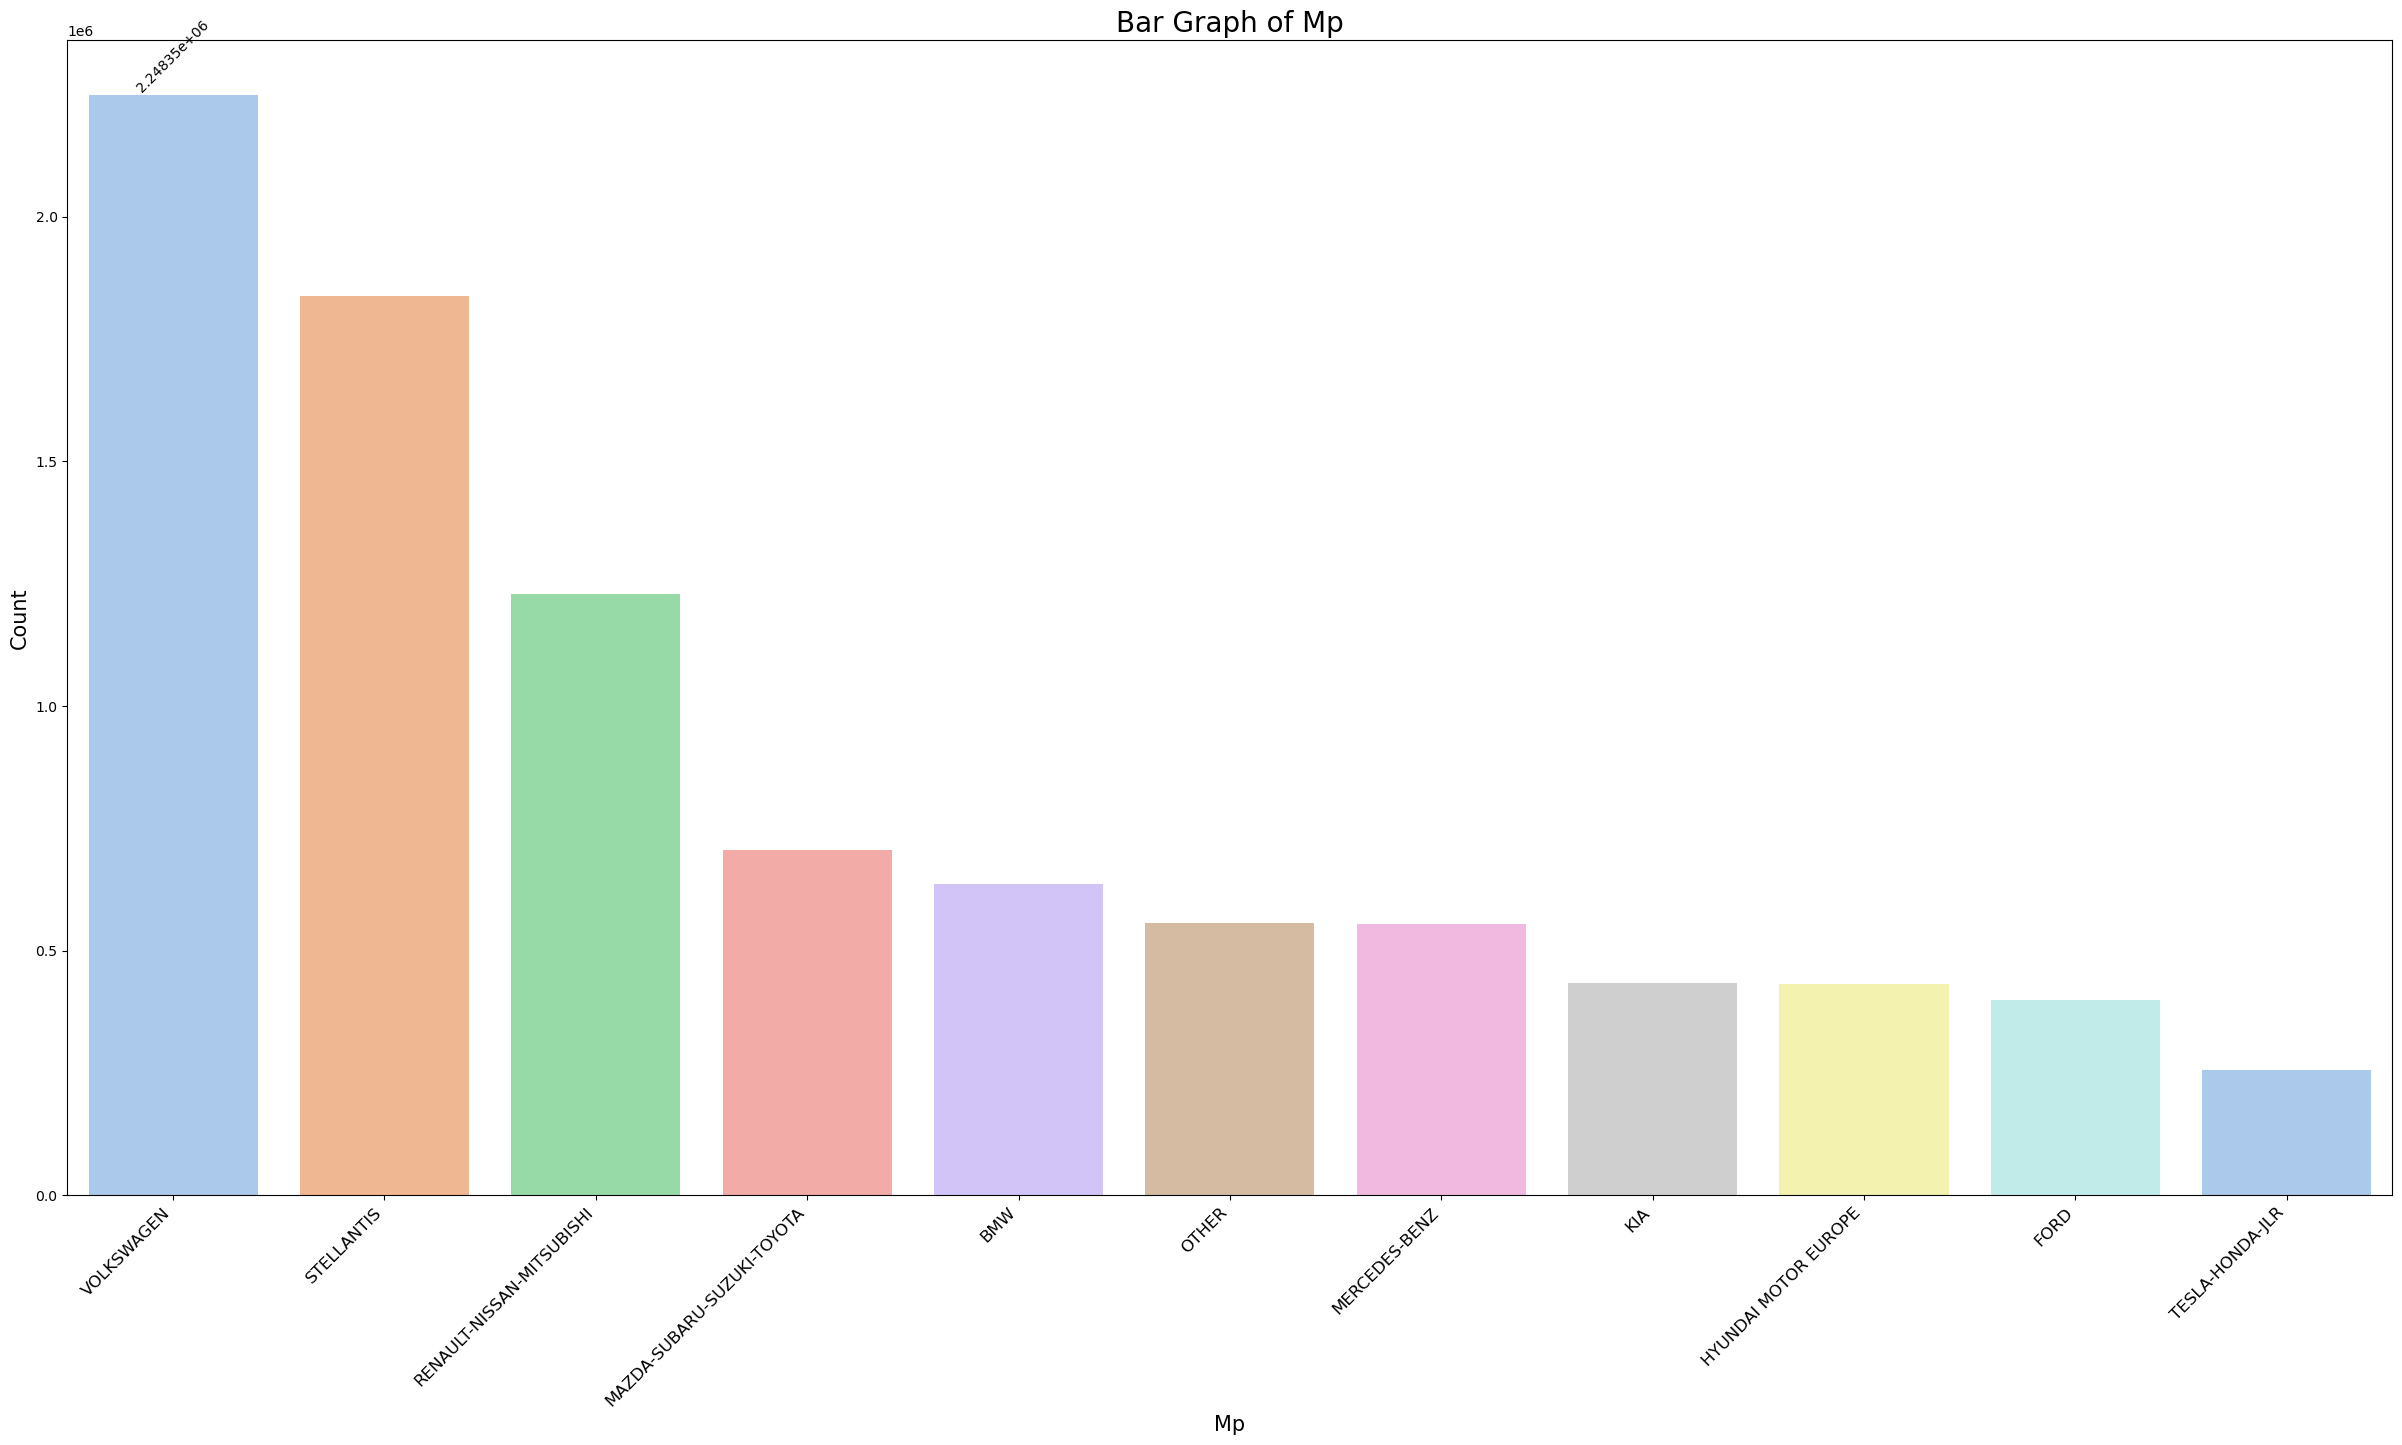

C:\Users\pierr\AppData\Local\Temp\ipykernel_16428\1532897439.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, order=df[column].value_counts().head(15).index,palette='pastel')


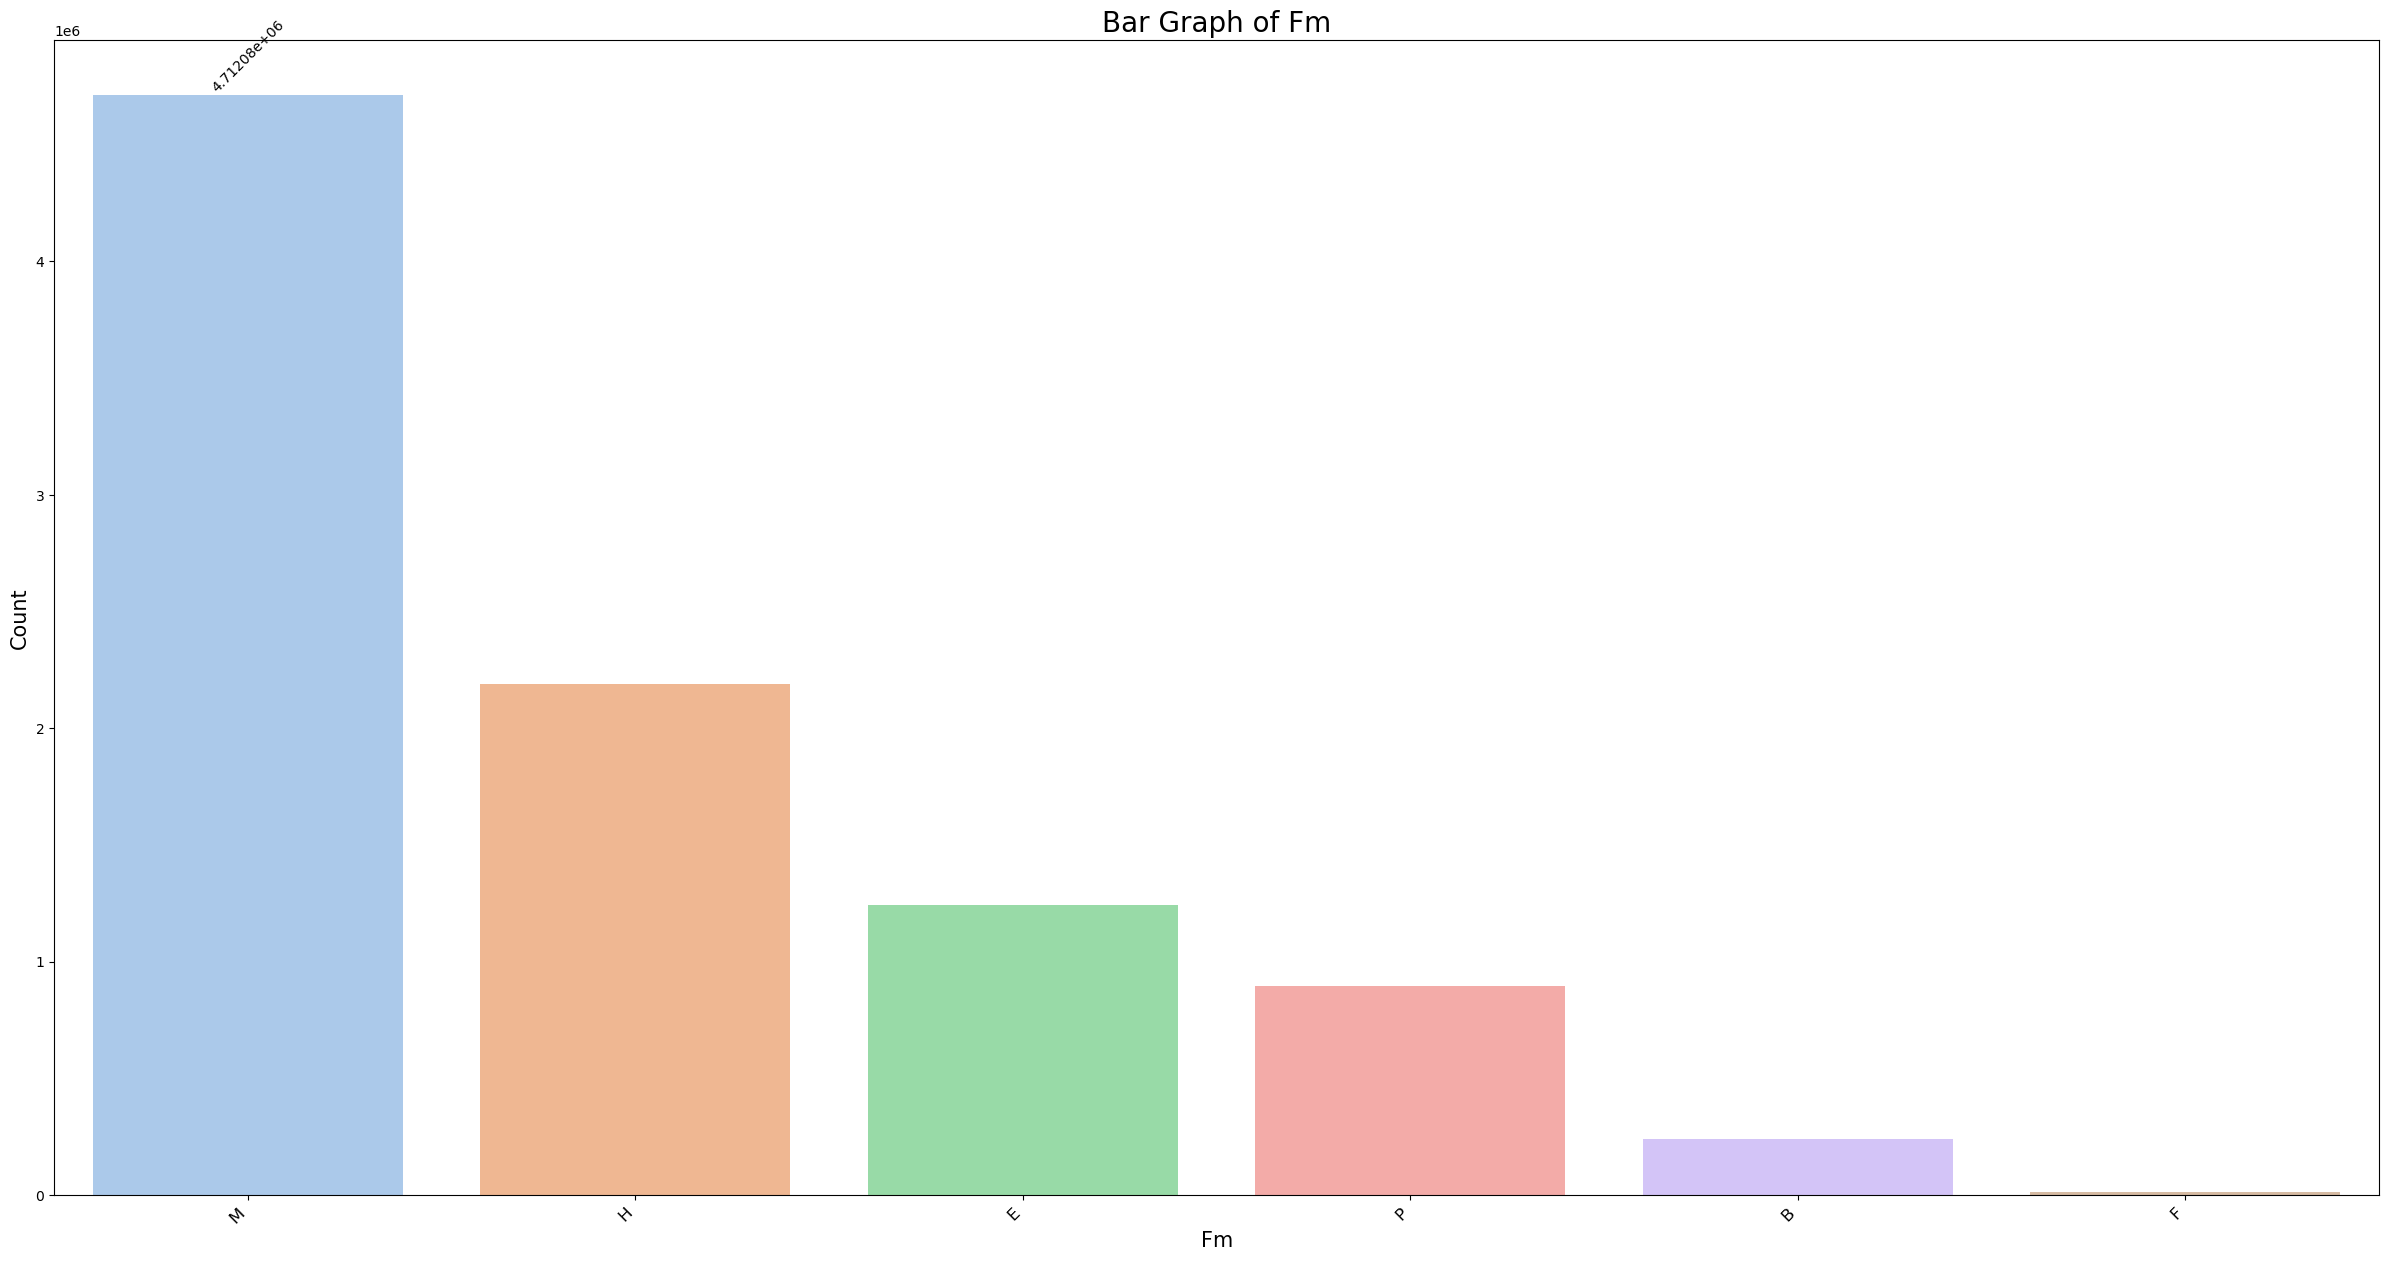

C:\Users\pierr\AppData\Local\Temp\ipykernel_16428\1532897439.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, order=df[column].value_counts().head(15).index,palette='pastel')


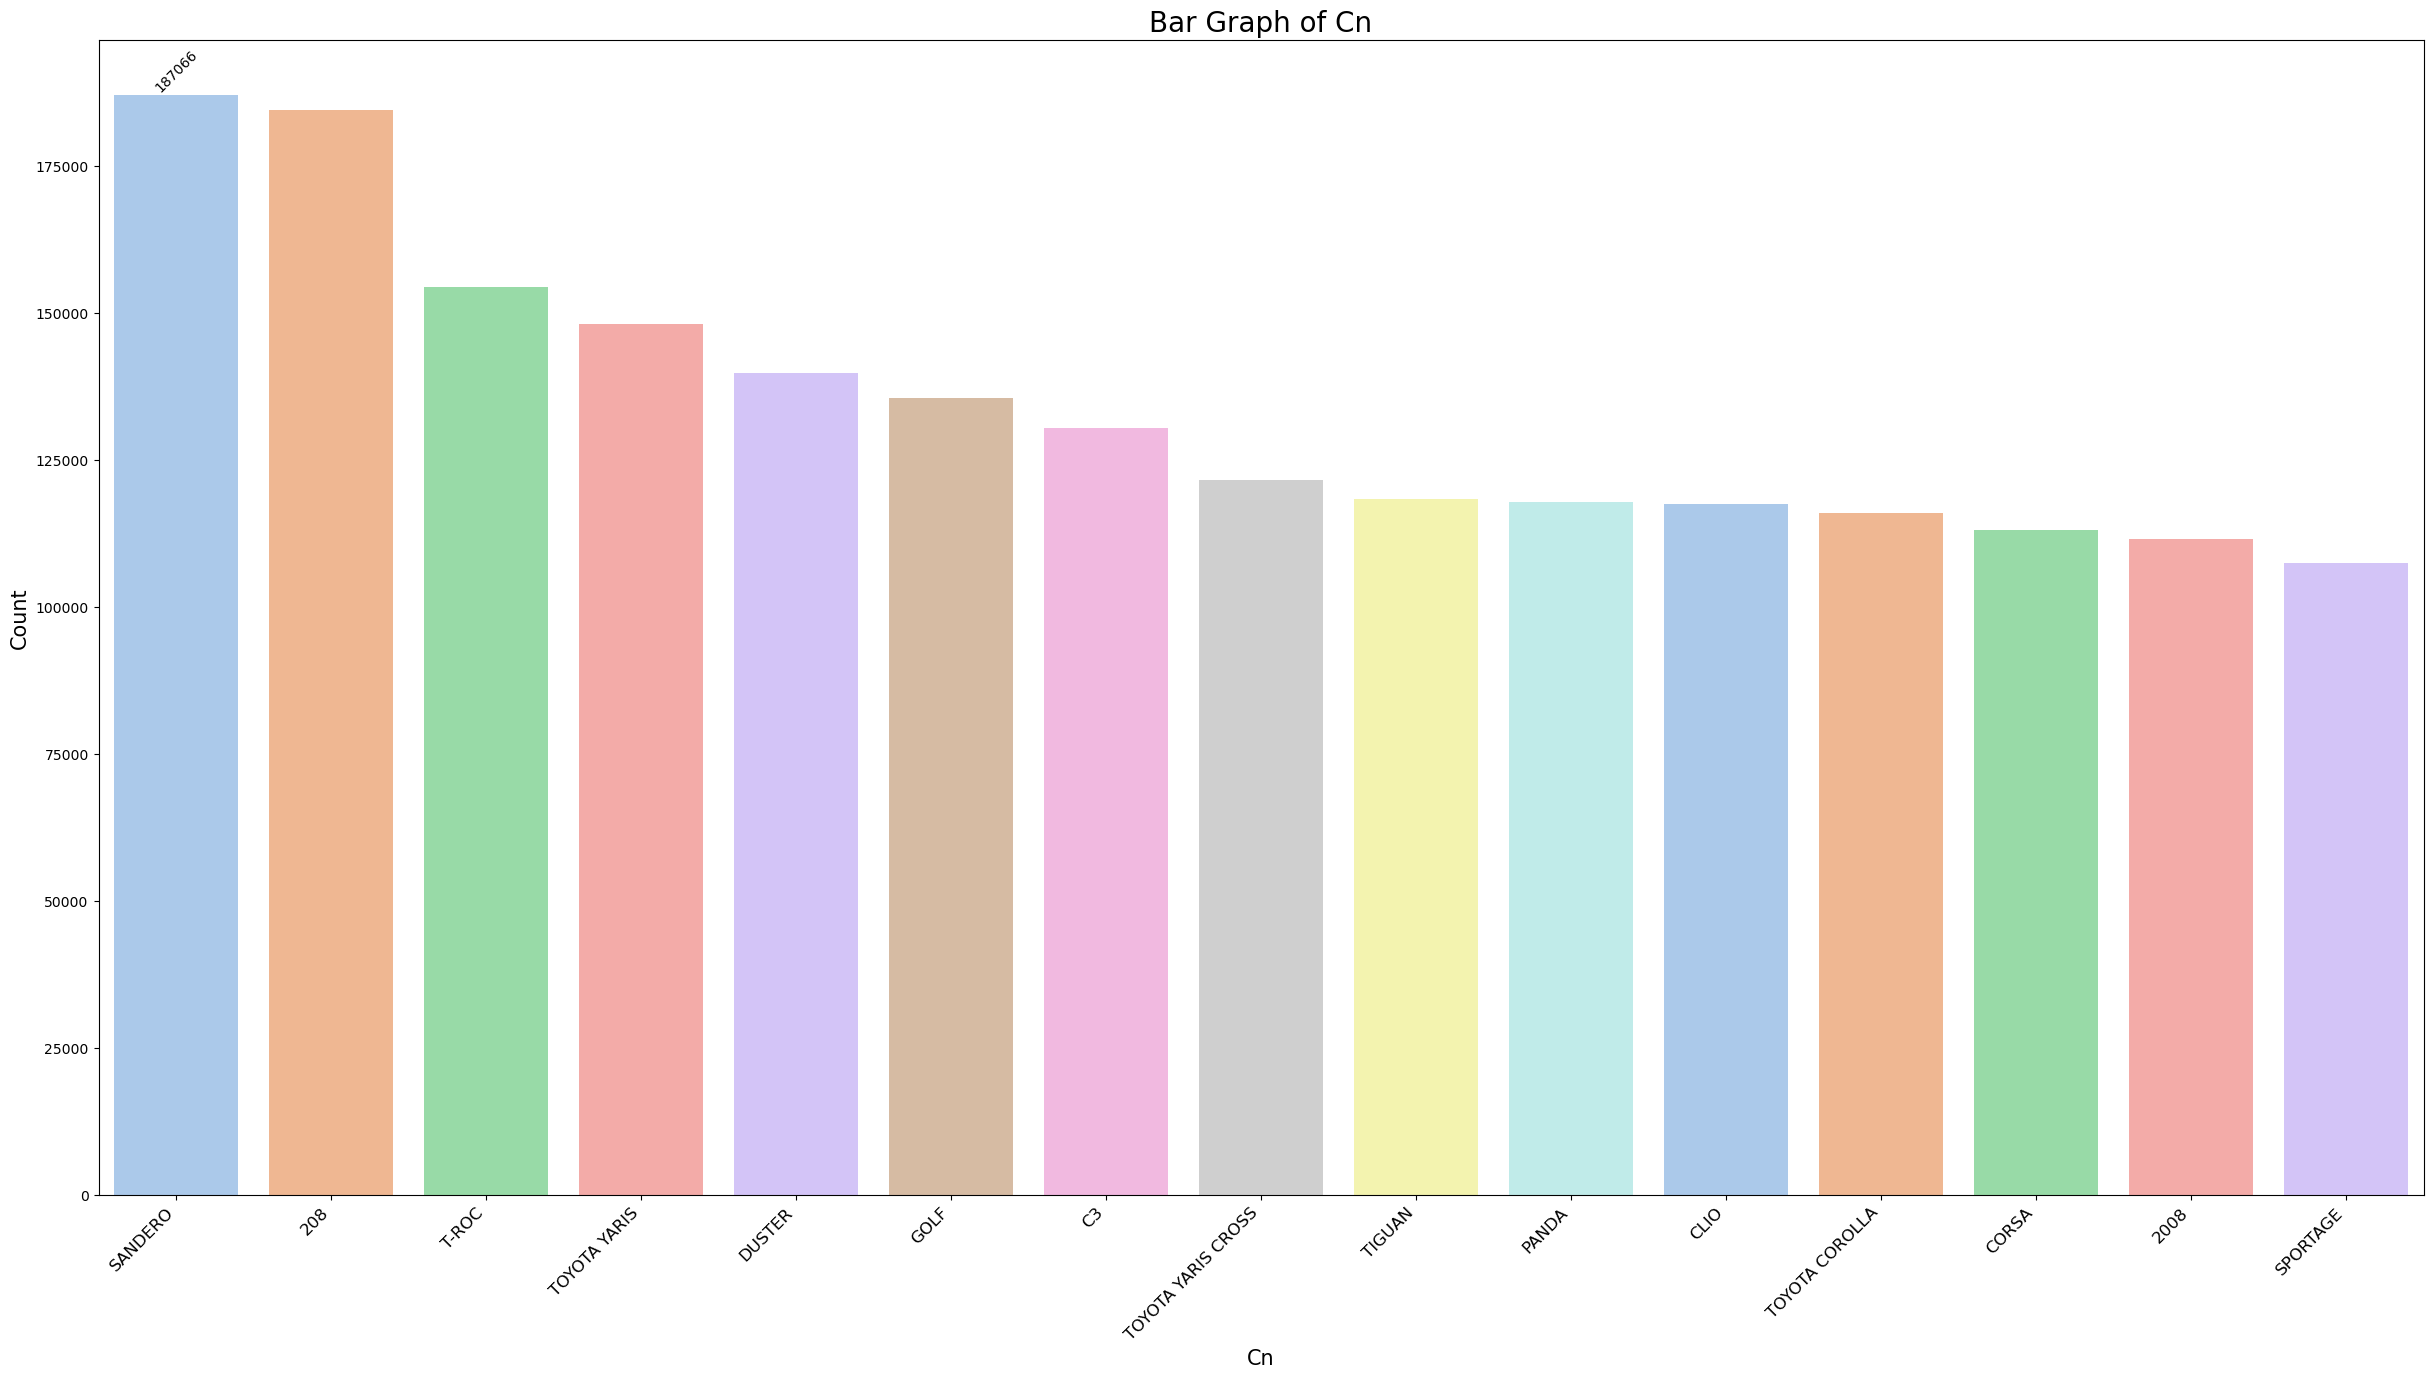

In [153]:
cat_features = ['Mp', 'Fm', 'Cn']
def plot_bar_graphs(df, columns):
    for column in cat_features:
        plt.figure(figsize=(30, 15))
        ax = sns.countplot(x=column, data=df, order=df[column].value_counts().head(15).index,palette='pastel')
        ax.bar_label(ax.containers[0],rotation=45)
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Count', fontsize=15)
        plt.title(f'Bar Graph of {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()
        
plot_bar_graphs(df, cat_features)